### Characteristics:
1. Balanced
2. RegAndDropout X
3. EmbeddingsUsingWord2VecMechanism-FromScratch (Not pretrained)
4. AllDatasetsEN
5. Analysis done on Neuroticism trait

In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.13.1
Default GPU Device: /device:GPU:0


# Part 1: Conversion to Binary Classes

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Import Facebook mypersonality dataset
df_new = pd.DataFrame()
df_new = pd.read_csv('C:/Users/Hassa/Desktop/StephanyAnaconda/Classification/datasets/mypersonality_final.csv', encoding = "latin_1")
df_new = df_new[['#AUTHID','STATUS','sOPN','sCON','sEXT','sAGR','sNEU']]

a = df_new

In [4]:
usergroup = a
usergroup

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,4.40,3.25,2.65,3.15,3.00
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,4.40,3.25,2.65,3.15,3.00
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,4.40,3.25,2.65,3.15,3.00
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,4.40,3.25,2.65,3.15,3.00
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,4.40,3.25,2.65,3.15,3.00
5,b7b7764cfa1c523e4e93ab2a79a946c4,www.thejokerblogs.com,4.40,3.25,2.65,3.15,3.00
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAM...",4.40,3.25,2.65,3.15,3.00
7,b7b7764cfa1c523e4e93ab2a79a946c4,is in Kentucky. 421 miles into her 1100 mile j...,4.40,3.25,2.65,3.15,3.00
8,b7b7764cfa1c523e4e93ab2a79a946c4,was about to finish a digital painting before ...,4.40,3.25,2.65,3.15,3.00
9,b7b7764cfa1c523e4e93ab2a79a946c4,is celebrating her new haircut by listening to...,4.40,3.25,2.65,3.15,3.00


# Thresholding at 2.5 where our scale's minimum is 0.0 and  maximum is 5.0

In [5]:
def label_sOPN (row):
    if row['sOPN'] >= 2.5:
        return 1
    if row['sOPN'] < 2.5:
        return 0

In [6]:
def label_sCON (row):
    if row['sCON'] >= 2.5:
        return 1
    if row['sCON'] < 2.5:
        return 0

In [7]:
def label_sEXT (row):
    if row['sEXT'] >= 2.5:
        return 1
    if row['sEXT'] < 2.5:
        return 0

In [8]:
def label_sAGR (row):
    if row['sAGR'] >= 2.5:
        return 1
    if row['sAGR'] < 2.5:
        return 0

In [9]:
def label_sNEU (row):
    if row['sNEU'] >= 2.5:
        return 1
    if row['sNEU'] < 2.5:
        return 0

In [10]:
usergroup['cOPN'] = usergroup.apply (lambda row: label_sOPN(row), axis=1)
usergroup['cCON'] = usergroup.apply (lambda row: label_sCON(row), axis=1)
usergroup['cEXT'] = usergroup.apply (lambda row: label_sEXT(row), axis=1)
usergroup['cAGR'] = usergroup.apply (lambda row: label_sAGR(row), axis=1)
usergroup['cNEU'] = usergroup.apply (lambda row: label_sNEU(row), axis=1)

In [11]:
usergroup

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU,cOPN,cCON,cEXT,cAGR,cNEU
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
5,b7b7764cfa1c523e4e93ab2a79a946c4,www.thejokerblogs.com,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAM...",4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
7,b7b7764cfa1c523e4e93ab2a79a946c4,is in Kentucky. 421 miles into her 1100 mile j...,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
8,b7b7764cfa1c523e4e93ab2a79a946c4,was about to finish a digital painting before ...,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1
9,b7b7764cfa1c523e4e93ab2a79a946c4,is celebrating her new haircut by listening to...,4.40,3.25,2.65,3.15,3.00,1,1,1,1,1


In [12]:
df_classification_cAGR= usergroup[['STATUS','cAGR']]
df_classification_cAGR

,STATUS,cAGR
0,likes the sound of thunder.,1
1,is so sleepy it's not even funny that's she ca...,1
2,is sore and wants the knot of muscles at the b...,1
3,likes how the day sounds in this new song.,1
4,is home. <3,1
5,www.thejokerblogs.com,1
6,"saw a nun zombie, and liked it. Also, *PROPNAM...",1
7,is in Kentucky. 421 miles into her 1100 mile j...,1
8,was about to finish a digital painting before ...,1
9,is celebrating her new haircut by listening to...,1


# ------------------------------------------------------------------------------------------------------------
# Part 2: Class Imbalacement Treatment
### Solution #1: Up-sample Minority Class

In [16]:
df_classification_cAGR['cAGR'].value_counts()

1    9339
0     578
Name: cAGR, dtype: int64

In [17]:
from sklearn.utils import resample

In [18]:
# Separate majority and minority classes
# In our case, the majority in the NEUROTICISM trait is 0 --> 523 and 1 --> 282 
df_majority = df_classification_cAGR[df_classification_cAGR.cAGR==1]
df_minority = df_classification_cAGR[df_classification_cAGR.cAGR==0]

In [19]:
df_majority.head()

,STATUS,cAGR
0,likes the sound of thunder.,1
1,is so sleepy it's not even funny that's she ca...,1
2,is sore and wants the knot of muscles at the b...,1
3,likes how the day sounds in this new song.,1
4,is home. <3,1


In [20]:
df_minority.head()

,STATUS,cAGR
769,is leaving tomorrow. wtf.,0
770,is wandering about in the Alaskan wilderness l...,0
771,"is in Homer, AK visiting *PROPNAME*!",0
772,just went to a bar with my mom and a bunch of ...,0
773,har mindre enn en måned til Oslo!,0


In [21]:
len(df_majority)

9339

In [22]:
len(df_minority)

578

In [24]:
 # Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=9339,    # to match majority class
                                 random_state=123) # reproducible results

In [25]:
len(df_minority_upsampled)

9339

In [26]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [27]:
 # Display new class counts
df_upsampled.cAGR.value_counts()

1    9339
0    9339
Name: cAGR, dtype: int64

In [28]:
df_upsampled

,STATUS,cAGR
0,likes the sound of thunder.,1
1,is so sleepy it's not even funny that's she ca...,1
2,is sore and wants the knot of muscles at the b...,1
3,likes how the day sounds in this new song.,1
4,is home. <3,1
5,www.thejokerblogs.com,1
6,"saw a nun zombie, and liked it. Also, *PROPNAM...",1
7,is in Kentucky. 421 miles into her 1100 mile j...,1
8,was about to finish a digital painting before ...,1
9,is celebrating her new haircut by listening to...,1



# --------------------------------------------------------------------
SOURCE: https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456
# Part 3: Classification of cAGR


# 1. The first step is to prepare the text corpus for learning the embedding by creating: (1) word tokens, (2) removing punctuation, (3) removing stop words etc. 

## NB: The word2vec algorithm processes documents sentence by sentence.

## New: Stop words list is now in english and arabic

In [29]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = list()
lines = df_upsampled['STATUS'].values.tolist()

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    stop_eng = stopwords.words('english')
    words = [w for w in words if not w in stop_eng]
    review_lines.append(words)

In [30]:
len(review_lines)

18678

In [31]:
review_lines[1]

['sleepy', 'even', 'funny', 'ca', 'nt', 'get', 'sleep']

In [32]:
len(review_lines[1])

7

In [33]:
review_lines[2]

['sore',
 'wants',
 'knot',
 'muscles',
 'base',
 'neck',
 'stop',
 'hurting',
 'hand',
 'yay',
 'illinois']

In [34]:
len(review_lines[2])

11

#### SO, It is essential to have equal input tensors for the neural network

# 2. Train word2vec model: Gensim’s Word2Vec API requires some parameters for initialization
1. __sentences__ – List of sentences; here we pass the list of review sentences.

2. __size__ – The number of dimensions in which we wish to represent our word. This is the size of the word vector.

3. __min_count__ – Word with frequency greater than min_count only are going to be included into the model. Usually, the bigger and more extensive your text, the higher this number can be.

4. __window__ – Only terms that occur within a window-neighborhood of a term, in a sentence, are associated with it during training. The usual value is 4 or 5.

5. __workers__– Number of threads used in training parallelization, to speed up training

In [35]:
import gensim 
from gensim.models import KeyedVectors
EMBEDDING_DIM = 300

model = KeyedVectors.load_word2vec_format('C:/Users/Hassa/Desktop/StephanyAnaconda/GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [36]:
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 3000000


C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [37]:
my_dict=dict({})
for idx, key in enumerate(model.wv.vocab):
    my_dict[key]=model.wv[key]

C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


# 3. Test Word2Vec Model
After we train the model on our dataset, it builds a vocabulary size = 37754 . Let us try some word embeddings the model learnt from the  dataset.

The most similar words for word 'horrible' are:

In [34]:
# let us try some utility functions of gensim word2vec more details here 
# If word is not in vocabulary, there will be an error
model.wv.most_similar('king')#, topn =1)

C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204219460487366),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864823460578918),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [35]:
#Let’s see the result of semantically reasonable word vectors (king - man + woman)
model.wv.most_similar_cosmul(positive=['good', 'beautiful'], negative=['bad'])

C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('lovely', 1.0306419134140015),
 ('wonderful', 1.0185023546218872),
 ('gorgeous', 0.9769635796546936),
 ('fabulous', 0.9750576615333557),
 ('magnificent', 0.9595586061477661),
 ('marvelous', 0.948007345199585),
 ('elegant', 0.9255857467651367),
 ('nice', 0.9224334359169006),
 ('stunningly_beautiful', 0.9212766885757446),
 ('delightful', 0.9196565747261047)]

In [36]:
model.wv.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.9314123392105103),
 ('monarch', 0.858533501625061),
 ('princess', 0.8476566076278687),
 ('Queen_Consort', 0.8150269985198975),
 ('queens', 0.8099815249443054),
 ('crown_prince', 0.8089975714683533),
 ('royal_palace', 0.8027306795120239),
 ('monarchy', 0.801961362361908),
 ('prince', 0.800979733467102),
 ('empress', 0.7958387136459351)]

In [37]:
print(model.wv.doesnt_match("woman king queen movie".split()))

movie


C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
C:\Users\Hassa\.conda\envs\gputest1\lib\site-packages\gensim\models\keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


This is very interesting to see the word embeddings learned by our word2vec model form the text corpus. __The next step is to use the word embeddings directly in the embedding layer in our regression analysis model__. we can save the model to be used later.

# 4. Use our pretrained embedding
1. Since we have already trained word2vec model with __OUR__ dataset, we have the word embeddings ready to use. 
(Steph: you can add our dataset to an existing word embedding (to be downloaded) or update it with the other MyPersonality dataset)

2. __The next step is to load the word embedding as a directory of words to vectors__. --> Steph: for each embedding index (key = word), we did an embedding 2D vector mapping all the word embeddings to be able to use them in our NeuralNet

3. The word embedding was saved in file ClassificationOfText-1.txt. Let us extract the word embeddings from the stored file.

# Embeddings are now not embeddings_index[word] but in my_dict[key]

In [38]:
# Extracting word embeddings from the stored file
#import os

#embeddings_index = {}
#f = open(os.path.join('', 'OpennessCode_BasicDNNvsMaximalRegularization.txt'),  encoding = "utf-8")
#for line in f:
#    values = line.split()
#    word = values[0]
#    coefs = np.asarray(values[1:])
#    embeddings_index[word] = coefs
#f.close()

In [39]:
from sklearn.model_selection import train_test_split
df_x = df_upsampled['STATUS'].values
df_y = df_upsampled['cAGR'].values
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state = 42)

In [40]:
y_train

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [41]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [42]:
len(df_upsampled)

19504

In [43]:
len(x_train)

9752

In [44]:
len(x_test)

9752

In [45]:
# Maximum number of words in a status = 6002
# We will pad all the words in a status on the maximum words # in a status with 0s, since we have to enter the same vector length
# Then this vector will be mapped to a word embedding of 10
total_reviews = x_train + x_test
max_length = max([len(s.split()) for s in total_reviews]) # Look at the max function --> It will get the max status length
max_length

153

### Steph: Not all statuses map to all embeddings, each status has specific words hence specific embeddings

In [46]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.2

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen=max_length)
sentiment =  df_upsampled['cAGR'].values
print('Shape of status tensor:', review_pad.shape) # 12223 rows, 360 cols as max length, not all filled with numbers other than 0s of course.
print('Shape of class tensor:', sentiment.shape) # 12223 rows, and 1 and only 1 default column containing sOPN value

num_words = len(word_index) + 1

# split the data into a training set and a validation set
indices = np.arange(review_pad.shape[0]) #take number of rows=12223 and shuffle them
indices[:10]


Found 15232 unique tokens.
Shape of status tensor: (19504, 153)
Shape of class tensor: (19504,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
np.random.shuffle(indices)
indices[:10]

array([ 1582, 19337,  3231, 12294,  6072,  2301,  2549, 14376,  6094,
         903])

In [48]:
review_pad = review_pad[indices]
review_pad[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  15, 136,
       606, 405, 607, 457, 188,  35, 156,  77, 151, 608])

In [49]:
# X independent variable
#N3AMALON PAD --> EQUAL SIZES for all review_pad[1]=review_pad[2]=review_pad[3]...=5905
len(review_pad[1])

153

In [50]:
len(review_pad[2])

153

In [51]:
# Y Target variable
sentiment = sentiment[indices]
sentiment[1]

0

In [52]:
review_pad.shape[0] #upsampled, it should've been 404 + 250 users.

19504

In [53]:
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0]) # 0.2 x 805 users
num_validation_samples

3900

In [54]:
X_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [55]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (15604, 153)
Shape of y_train tensor: (15604,)
Shape of X_test_pad tensor: (3900, 153)
Shape of y_test tensor: (3900,)


# WE ARE USING THIS SPLIT: Training-Validation-Testing Data
# ----------------------------------------------------------------------------------------------

In [56]:
from sklearn.model_selection import train_test_split
df_x = df_upsampled['STATUS'].values
df_y = df_upsampled['cAGR'].values
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(review_pad, sentiment, test_size=0.3, random_state = 42)

In [57]:
print('Shape of X_train_pad tensor:', x_train.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', x_val_and_test.shape)
print('Shape of y_test tensor:', y_val_and_test.shape)

Shape of X_train_pad tensor: (13652, 153)
Shape of y_train tensor: (13652,)
Shape of X_test_pad tensor: (5852, 153)
Shape of y_test tensor: (5852,)


source: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
## Splitting our data into 3: Training, Validation, and Testing

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

from sklearn.model_selection import train_test_split
Then, split your dataset like this:

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
This tells scikit-learn that your val_and_test size will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.

### Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

#### X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
The code above will split the val_and_test size equally to the validation set and the test set.

In summary, we now have a total of six variables for our datasets we will use:

1. X_train (10 input features, 80% of full dataset)
2. X_val (10 input features, 10% of full dataset)
3. X_test (10 input features, 10% of full dataset)
4. Y_train (1 label, 80% of full dataset)
5. Y_val (1 label, 10% of full dataset)
6. Y_test (1 label, 10% of full dataset)
7. If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

### Once you’re happy with your final model, we can evaluate it on the test set. To find the accuracy on our test set, we run this code snippet:

- model.evaluate(X_test, Y_test)[1]

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

### Due to the randomness in how we have split the dataset as well as the initialization of the weights, the numbers and graph will differ slightly each time we run our notebook. Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture I specified above!

In [58]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.34)

In [59]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(13652, 153) (3862, 153) (1990, 153) (13652,) (3862,) (1990,)


# 5. The next step is to convert the word embedding into tokenized vector. 
- __Before: Recall that the review documents are integer encoded prior to passing them to the Embedding layer__. 
- __The intenger still has meaning:__ The integer maps to the index of a specific vector in the embedding layer. Therefore, it is important that we lay the vectors out in the Embedding layer such that the encoded words map to the correct vector.

# 6. Now we will map embeddings from the loaded word2vec model for each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

### word_index: dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

In [60]:
EMBEDDING_DIM =300
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM)) # Create matrix with the following dimensions

for word, i in word_index.items(): # defined above as: word_index = tokenizer_obj.word_index, returns a key,value pair
    #key=word stored in word and value=rank/index stored in i
    if i > num_words:
        continue
    #embedding_vector = embeddings_index.get(word) # --> get the embeddings already trained for (embeddings_index[word] = coefs)
    embedding_vector = my_dict.get(word)
    # The get() method returns the value for the specified key if key is in dictionary.
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector # Fill our membedding matrix for all words found in our vocabulary (7897 words)
        # i = rank/index
        # embedding_vector = weights of embeddings learnt

### Embedding layer example: 
below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.

__e = Embedding(200, 32, input_length=50)__ <br>
Summary would be:<br>
Embedding layer (None, 50, 32)

### Model 1: Global Average Pooling with 2 hidden layers (input layer = embedding and output layer = sigmoid)
#### Case 1: Normal

In [61]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

# define model
model1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1.add(keras.layers.GlobalAveragePooling1D())
model1.add(keras.layers.Dense(16, activation=tf.nn.relu))
model1.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 153, 300)          4569900   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4816      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 4,574,733
Trainable params: 4,833
Non-trainable params: 4,569,900
_________________________________________________________________
None


In [62]:
# compile network
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# train the model
model1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 4s - loss: 0.6831 - acc: 0.5923 - val_loss: 0.6674 - val_acc: 0.6507
Epoch 2/10
 - 2s - loss: 0.6477 - acc: 0.6717 - val_loss: 0.6283 - val_acc: 0.6779
Epoch 3/10
 - 2s - loss: 0.6071 - acc: 0.7059 - val_loss: 0.5890 - val_acc: 0.7160
Epoch 4/10
 - 2s - loss: 0.5712 - acc: 0.7241 - val_loss: 0.5577 - val_acc: 0.7333
Epoch 5/10
 - 2s - loss: 0.5426 - acc: 0.7367 - val_loss: 0.5334 - val_acc: 0.7333
Epoch 6/10
 - 2s - loss: 0.5195 - acc: 0.7486 - val_loss: 0.5130 - val_acc: 0.7439
Epoch 7/10
 - 2s - loss: 0.5012 - acc: 0.7622 - val_loss: 0.4975 - val_acc: 0.7607
Epoch 8/10
 - 2s - loss: 0.4852 - acc: 0.7741 - val_loss: 0.4830 - val_acc: 0.7721
Epoch 9/10
 - 2s - loss: 0.4724 - acc: 0.7830 - val_loss: 0.4711 - val_acc: 0.7802
Epoch 10/10
 - 2s - loss: 0.4600 - acc: 0.7897 - val_loss: 0.4609 - val_acc: 0.7859


In [64]:
# evaluate the model on test set
model1.evaluate(x_test, y_test)[1]

1990/1990 [==============================] - 0s 48us/step


0.7738693467935726

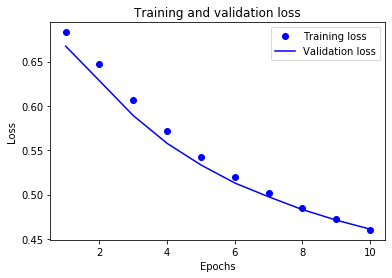

In [67]:
import matplotlib.pyplot as plt

acc = model1.history.history['acc']
val_acc = model1.history.history['val_acc']
loss = model1.history.history['loss']
val_loss = model1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

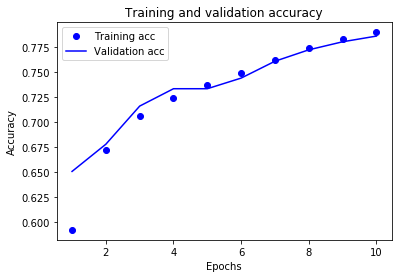

In [68]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model 2: Convolutional Neural Network with max pooling (3 hidden layers)
#### Case 1: Normal

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant


# define model
model2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model2.add(embedding_layer)
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2.summary())

# compile network
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 153, 300)          4569900   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 151, 128)          115328    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9601      
Total params: 4,694,829
Trainable params: 124,929
Non-trainable params: 4,569,900
_________________________________________________________________
None
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 6s - loss: 0.2826 - acc: 0.8842 - val_loss: 0.1029 - val_a

In [70]:
# evaluate the model on test set
model2.evaluate(x_test, y_test)[1]

1990/1990 [==============================] - 0s 90us/step


0.9618090452261306

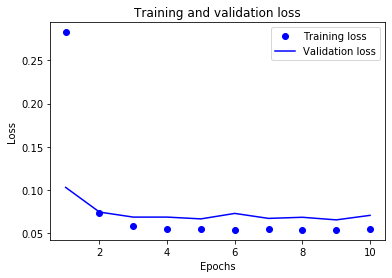

In [71]:
acc = model2.history.history['acc']
val_acc = model2.history.history['val_acc']
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

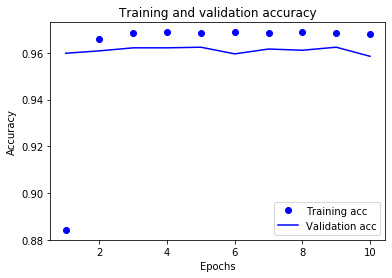

In [72]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model 3: RNN's GRU 
The time to train a GRU is less than LSTM network.

#### Case 1: Normal

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, CuDNNLSTM, CuDNNGRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant


# From Keras official website
# dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the INPUTS.
# recurrent_dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the RECURRENT STATE.


# define model
model3 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3.add(embedding_layer)
#model3.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3.add(CuDNNGRU(units=32))
model3.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3.summary())

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 153, 300)          4569900   
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 32)                32064     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,601,997
Trainable params: 32,097
Non-trainable params: 4,569,900
_________________________________________________________________
None


In [74]:
print('Train...')
model3.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train...
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 6s - loss: 0.4013 - acc: 0.8210 - val_loss: 0.1873 - val_acc: 0.9340
Epoch 2/10
 - 4s - loss: 0.1213 - acc: 0.9614 - val_loss: 0.1229 - val_acc: 0.9557
Epoch 3/10
 - 4s - loss: 0.0628 - acc: 0.9793 - val_loss: 0.1437 - val_acc: 0.9511
Epoch 4/10
 - 4s - loss: 0.0457 - acc: 0.9828 - val_loss: 0.0837 - val_acc: 0.9736
Epoch 5/10
 - 4s - loss: 0.0298 - acc: 0.9884 - val_loss: 0.0551 - val_acc: 0.9790
Epoch 6/10
 - 4s - loss: 0.0238 - acc: 0.9892 - val_loss: 0.0565 - val_acc: 0.9777
Epoch 7/10
 - 4s - loss: 0.0229 - acc: 0.9884 - val_loss: 0.0518 - val_acc: 0.9806
Epoch 8/10
 - 4s - loss: 0.0188 - acc: 0.9903 - val_loss: 0.0549 - val_acc: 0.9811
Epoch 9/10
 - 4s - loss: 0.0244 - acc: 0.9892 - val_loss: 0.0524 - val_acc: 0.9808
Epoch 10/10
 - 4s - loss: 0.0181 - acc: 0.9899 - val_loss: 0.0441 - val_acc: 0.9829


In [75]:
# --> Didn't generalize well.
# evaluate the model on test set
model3.evaluate(x_test, y_test)[1]

1990/1990 [==============================] - 0s 130us/step


0.9809045225531612

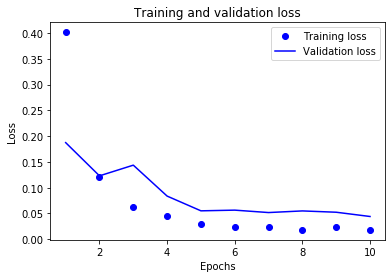

In [76]:
loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

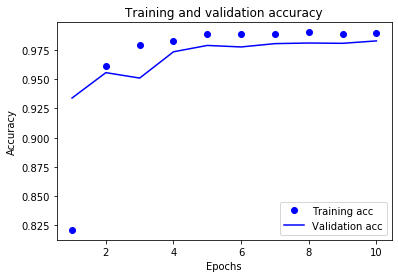

In [77]:
acc = model3.history.history['acc']
val_acc =model3.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model 4: RNN's LSTM 

#### Case 1: Normal

In [78]:
# define model
model4 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4.add(embedding_layer)
model4.add(CuDNNLSTM(32))
model4.add(Dense(1, activation='sigmoid'))
print(model4.summary())

# compile network
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 153, 300)          4569900   
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 32)                42752     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,612,685
Trainable params: 42,785
Non-trainable params: 4,569,900
_________________________________________________________________
None
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 7s - loss: 0.3958 - acc: 0.8216 - val_loss: 0.2169 - val_acc: 0.9195
Epoch 2/10
 - 4s - loss: 0.1531 - acc: 0.9498 - val_loss: 0.1226 - val_acc: 0.9622
Epoch 3/10
 - 4s - loss: 0.0766 - acc: 0.9776 - val_loss: 0.1485 - val_acc: 0.9539
Epoch 4/10
 - 4s - loss: 0.0593 - acc: 0.9811 - val_loss: 0.0655 - val_acc: 0.9770
Epoch

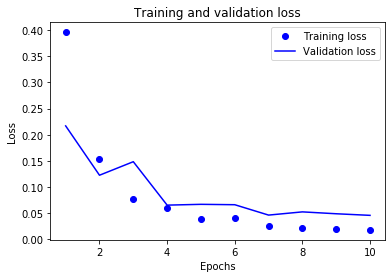

In [79]:
loss = model4.history.history['loss']
val_loss = model4.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

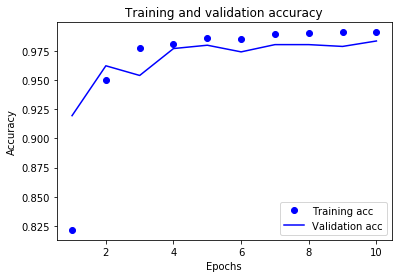

In [80]:
acc = model4.history.history['acc']
val_acc =model4.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [81]:
# evaluate the model on test set
model4.evaluate(x_test, y_test)[1]

1990/1990 [==============================] - 0s 148us/step


0.9783919597390908

# Model 1,2,3,4 with maximal regularization

In [82]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

from keras.layers import Dense, Embedding, CuDNNLSTM, CuDNNGRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

In [83]:
import matplotlib.pyplot as plt

### 1. ANN Dropout Layer + l2 in dense layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 153, 300)          4569900   
_________________________________________________________________
global_average_pooling1d_9 ( (None, 300)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 16)                4816      
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 17        
Total params: 4,574,733
Trainable params: 4,833
Non-trainable params: 4,569,900
_________________________________________________________________
None
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 14s - loss: 0.8327 - acc: 0.4918 - val_loss: 0.6932 - val_ac

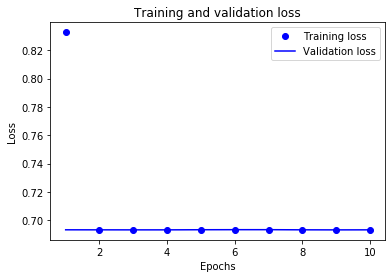

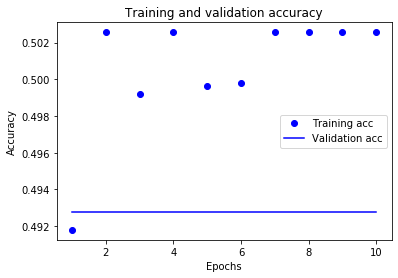

In [124]:

# define model
model1_drop_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1_drop_l1.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_drop_l1.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_drop_l1.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.05) ,activation=tf.nn.relu))
model1_drop_l1.add(keras.layers.Dropout(0.5))
model1_drop_l1.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_drop_l1.summary())

# compile network
model1_drop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_drop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

acc = model1_drop_l1.history.history['acc']
val_acc = model1_drop_l1.history.history['val_acc']
loss = model1_drop_l1.history.history['loss']
val_loss = model1_drop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [118]:
# evaluate the model on test set
model1_drop_l1.evaluate(x_test, y_test)[1]

1990/1990 [==============================] - 0s 77us/step


0.49648241209025357

### 2. CNN Case 6: Dropout Layer + l2 in CNN layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 153, 300)          4569900   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 151, 128)          115328    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 75, 128)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9600)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9601      
Total params: 4,694,829
Trainable params: 124,929
Non-trainable params: 4,569,900
____________________________________________________________

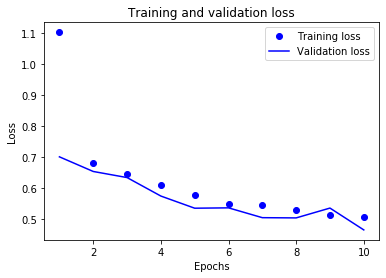

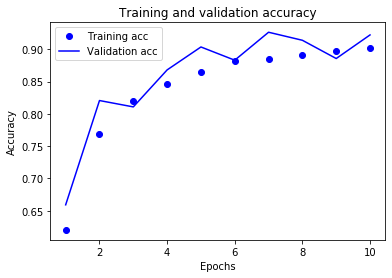

1990/1990 [==============================] - 0s 109us/step


0.9090452260707491

In [113]:
# define model
model2_drop_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
#Dropout in conv layer may lose some important features but we can apply regulizers
model2_drop_l1.add(embedding_layer)
model2_drop_l1.add(Conv1D(filters=128, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.05), activation='relu'))
model2_drop_l1.add(MaxPooling1D(pool_size=2))
model2_drop_l1.add(Flatten())
model2_drop_l1.add(keras.layers.Dropout(0.5))
model2_drop_l1.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_drop_l1.summary())

# compile network
model2_drop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_drop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)


loss = model2_drop_l1.history.history['loss']
val_loss = model2_drop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = model2_drop_l1.history.history['acc']
val_acc =model2_drop_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# evaluate the model on test set
model2_drop_l1.evaluate(x_test, y_test)[1]

### 3. GRU Dropout and recurrent dropout in the GRU layer with L2 regulizer in GRU Layer

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 153, 300)          4569900   
_________________________________________________________________
cu_dnngru_3 (CuDNNGRU)       (None, 32)                32064     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 4,601,997
Trainable params: 32,097
Non-trainable params: 4,569,900
_________________________________________________________________
None
Train...
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 14s - loss: 1.5367 - acc: 0.6570 - val_loss: 0.6657 - val_acc: 0.6787
Epoch 2/10
 - 4s - loss: 0.6411 - acc: 0.7159 - val_loss: 0.6516 - val_acc: 0.6714
Epoch 3/10
 - 4s - loss: 0.6054 - acc: 0.7486 - val_loss: 0.5831 - val_acc: 0.7848
Epoch 4/10
 - 5s - loss: 0.5631 - acc: 0.8037 - 

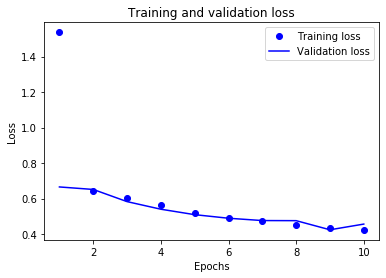

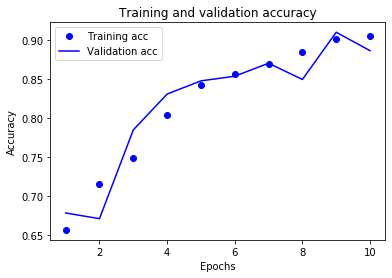

1990/1990 [==============================] - 0s 139us/step


0.8839195979300456

In [114]:
# define model
model3_drop_recdrop_l1 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_drop_recdrop_l1.add(embedding_layer)
#model3_drop_recdrop_l1.add(CuDNNGRU(units=32,  dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l1(0.01) ))
model3_drop_recdrop_l1.add(CuDNNGRU(units=32, recurrent_regularizer=keras.regularizers.l2(0.05), kernel_regularizer=keras.regularizers.l2(0.05) ))
model3_drop_recdrop_l1.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_drop_recdrop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_drop_recdrop_l1.summary())

print('Train...')
model3_drop_recdrop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)


loss = model3_drop_recdrop_l1.history.history['loss']
val_loss = model3_drop_recdrop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = model3_drop_recdrop_l1.history.history['acc']
val_acc =model3_drop_recdrop_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# evaluate the model on test set
model3_drop_recdrop_l1.evaluate(x_test, y_test)[1]

### 4. LSTM Dropout and recurrent dropout in the LSTM layer with L2 regulizer in LSTM Layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 153, 300)          4569900   
_________________________________________________________________
cu_dnnlstm_21 (CuDNNLSTM)    (None, 32)                42752     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 4,612,685
Trainable params: 42,785
Non-trainable params: 4,569,900
_________________________________________________________________
None
Train on 13652 samples, validate on 3862 samples
Epoch 1/10
 - 15s - loss: 1.5997 - acc: 0.6362 - val_loss: 0.6179 - val_acc: 0.7478
Epoch 2/10
 - 5s - loss: 0.5570 - acc: 0.7925 - val_loss: 0.5246 - val_acc: 0.8017
Epoch 3/10
 - 5s - loss: 0.4872 - acc: 0.8458 - val_loss: 0.5196 - val_acc: 0.7830
Epoch 4/10
 - 5s - loss: 0.4417 - acc: 0.8699 - val_loss: 0.4185 - val_acc: 0.8931
Epoc

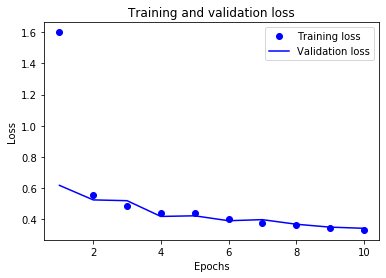

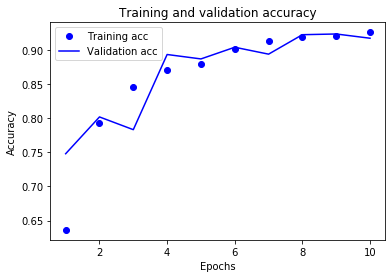

1990/1990 [==============================] - 0s 163us/step


0.9100502513161856

In [120]:
# define model
model4_drop_recdrop_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_drop_recdrop_l1.add(embedding_layer)
#model4_drop_recdrop_l1.add(CuDNNLSTM(32, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l1(0.01)))
model4_drop_recdrop_l1.add(CuDNNLSTM(32, recurrent_regularizer=keras.regularizers.l2(0.05), kernel_regularizer=keras.regularizers.l2(0.05)))
model4_drop_recdrop_l1.add(Dense(1, activation='sigmoid'))
print(model4_drop_recdrop_l1.summary())

# compile network
model4_drop_recdrop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_drop_recdrop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

loss = model4_drop_recdrop_l1.history.history['loss']
val_loss = model4_drop_recdrop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = model4_drop_recdrop_l1.history.history['acc']
val_acc =model4_drop_recdrop_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# evaluate the model on test set
model4_drop_recdrop_l1.evaluate(x_test, y_test)[1]